<a href="https://colab.research.google.com/github/MinCiencia/Datos-COVID19/blob/master/DataObservatory_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Data Observatory logo" height="150px" src="http://dataobservatory.io/wp-content/themes/data-observatory-01/img/do-logo-web-01.png"  align="left" hspace="10px" vspace="0px"></p>

<h1 align="center">Bienvenido al jupyter notebook: ejemplos para ayudar a usar los datos publicados</h1>
<h4 align="center">Una contribución del Data Observatory</h4>



## **Para empezar**

Este documento te permite interactuar con los datos que se encuentran en el [repositorio](https://github.com/MinCiencia/Datos-COVID19) del [Ministerio de Ciencia, Tecnología, Conocimiento e Innovación](http://www.minciencia.gob.cl/COVID19). Estos datos son recopilados de las cifras oficiales publicadas por el [Ministerio de Salud](https://www.gob.cl/coronavirus/cifrasoficiales/#informes) sobre la pandemia del COVID-19 en Chile.

Este notebook es un ejemplo y puedes usarlo como base para generar tus propios gráficos y/o productos. Los datos publicados están en https://colab.research.google.com/github/MinCiencia/output/blob/master


# <h2>Para trabajar con los productos</h2>

Este notebook está escrito utilizando el lenguaje de programación [Python](https://www.python.org/about/) versión [3.x](https://www.python.org/download/releases/3.0/), cuya lectura se facilita a programadores no expertos. Cada bloque de ejecución está separado en distintas celdas, es necesario "ejecutar" cada una en secuencia haciendo click en botón "play" que aparece al posicionar el mouse sobre el recuadro [ ] al inicio de cada celda. Una vez que la celda se ejecuta, aparece un número que indica el órden en que se ha ejecutado.




Recomendamos ver el notebook anterior para utilizar algunas funciones útiles de python y las bibliotecas que hemos ido utilizando

Una manera comun de manipular los datos, es usando [pandas](https://pandas.pydata.org/). Para cargar uno de los archivos en un dataframe. También es necesario utilizar [numpy](https://numpy.org/) para los distintos cálculos

In [0]:
import numpy as np
import pandas as pd

**Nota:** Los datos están almacenados como tablas en formato csv. Algunas tablas están almacenadas por día. Es importante mantener el formato 'año-mes-día' (las comillas simples o dobles indican que es texto y no se ejecutará como una operación matemática)


# <h3>Graficar datos de varios días</h3>

Para utilizar los datos de distintos días debemos establecer las fechas de nuestro interés. En los próximos ejemplos consideramos que la última fecha a graficar es hoy y se especifíca en la variable 'date' y la primera fecha ('first_date') es cuando se reportó el primer contagio en el país. también consideramos la fecha del primer caso recuperado ('first_recovered')

In [0]:
# el símbolo # al inicio de la línea nos indica que esto es un comentario, no se ejecuta con el código
# date indica la fecha de los datos que queremos utilizar

date = '2020-05-05'

In [0]:
first_date = '2020-03-03'
first_recovered = '2020-03-17'

# contamos los días considerados con la siguiente instrucción
total_days = (pd.to_datetime(date)-pd.to_datetime(first_date)).days
total_days

63

Se lee la tabla dada en el producto 5, con los totales nacionales en distintas categorias

In [0]:
dataTotal = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv", index_col=0)
dataTotal.index

Index(['Casos nuevos con sintomas', 'Casos totales', 'Casos recuperados',
       'Fallecidos', 'Casos activos', 'Casos nuevos sin sintomas',
       'Casos nuevos totales'],
      dtype='object', name='Fecha')

Listamos los nombres de las columnas, así sabemos el rango de fechas que contamos en dataTotal

In [0]:
columnas = list(dataTotal.columns.values)
columnas

Ordenamos en nuevos dataFrames para tener mayor claridad

In [0]:
# dataNew corresponde a los nuevos casos por día
# dataCum a los datos acumulados al día
# dataDeath al número de fallecidos acumulados al día
# dataRec es el número de recuperados acumulados al día

dataRec = dataTotal.loc['Casos recuperados']
dataNew = dataTotal.loc['Casos nuevos totales']
dataCum = dataTotal.loc['Casos totales']
dataDeath = dataTotal.loc['Fallecidos']

Para hacer gráficos utilizamos matplotlib, con el estilo (opcional) 'fivethirtyeight'

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Si queremos agregar información a la visualización de los datos, añadimos etiquetas a los gráficos utilizando una función (la definimos una vez y se "llamará" cuando se necesite). La utilizaremos en la figura siguiente como ejemplo

In [0]:
#  Función que define etiquetas en los gráficos. Aquí **no es necesario modificarla**
#
#  qué significan los parámetros:
#  data: el dataFrame a utilizar e.g. data['nuevosConfirmados'].iloc[:-1]
#  scale: la que se defina en el entorno de la figura
#  fontsize: tamaño de la fuente de la etiqueta
#  ypos: posición de la etiqueta con respecto al valor graficado
#  color: el color de la etiqueta (estamos utilizando transparencia con alpha=0.5)

def my_tags(data,scale,fontsize,ypos,color):
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos 
      elif scale == 'linear': y_position = val + ypos
      ax.text(i-len(str(i))*0.1, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))

En la siguiente figura graficamos los valores de los casos confirmados acumulados y los recuperados para todo el país. 

(A diferencia de la versión anterior del notebook, el producto 5 del repositorio del Ministerio de Ciencia tiene un orden diferente que facilita el manejo de los datos)

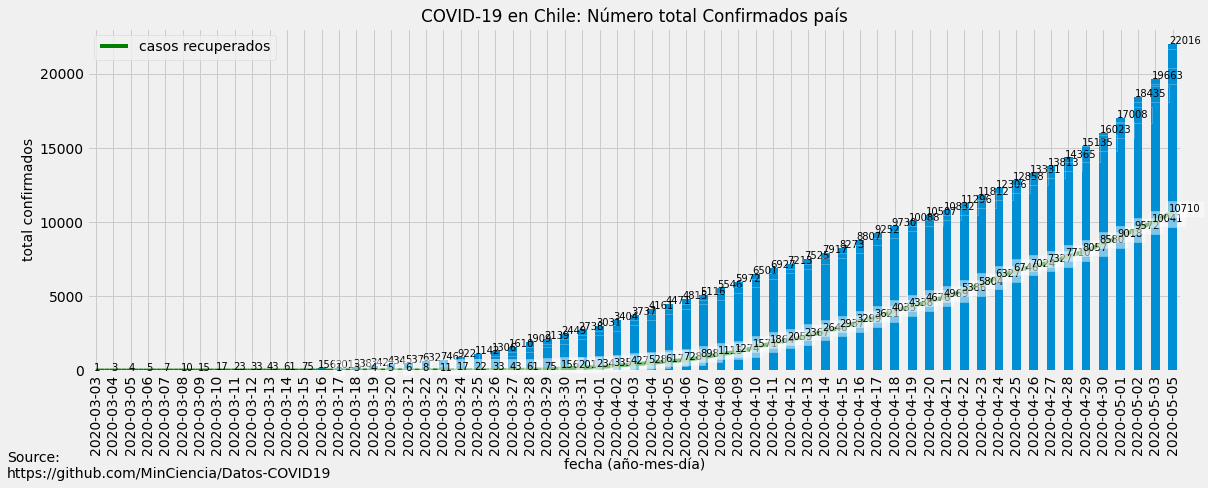

In [0]:
filename = date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'linear'
fontsize = 10
dataCum.plot(ax=ax, kind="bar")
my_tags(dataCum,scale,fontsize,1.4,'none')

ax.plot(dataRec,color='green')
my_tags(dataRec,scale,fontsize,1.15,'white')

ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos recuperados'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total Confirmados país', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior
from google.colab import files
files.download(filename)

Si se quiere graficar un rango menor de fechas, solo se debe modificar la variable "first_date" hasta la fecha "date" que se prefiera. Por ejemplo:

In [0]:
first_date = '2020-04-29'

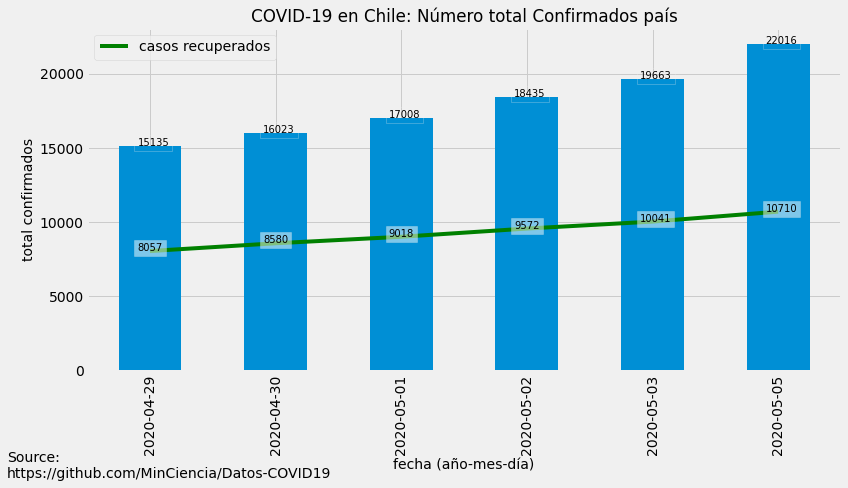

In [0]:
filename = first_date+'_'+date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(12,7))

scale = 'linear'
fontsize = 10
dataCum[first_date:date].plot(ax=ax, kind="bar")
my_tags(dataCum[first_date:date],scale,fontsize,1.4,'none')

ax.plot(dataRec[first_date:date],color='green')
my_tags(dataRec[first_date:date],scale,fontsize,1.15,'white')

ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos recuperados'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total Confirmados país', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

También se modificó el tamaño de la figura en la instrucción, para mejorar su aspecto (figsize = (12, 7), en vez de (17,7) como en los casos anteriores)


```
# fig, ax = plt.subplots(tight_layout=True,figsize=(12,7))
```



Para continuar, en este ejemplo es preferible volver a nuestra elección inicial de 'first_date' como el día en que se reportó el primer caso confirmado por SARS-CoV-2 en el país

In [0]:
first_date = '2020-03-03'

Queremos incluir en el gráfico los casos considerados activos siguiendo la definición de la Organización Mundial de la Salud (OMS)


Activos = Casos Acumulados - Casos Recuperados - Fallecidos



In [0]:
dataActivo = dataCum - dataRec - dataDeath

Con los casos activos y fallecidos complementamos la figura anterior

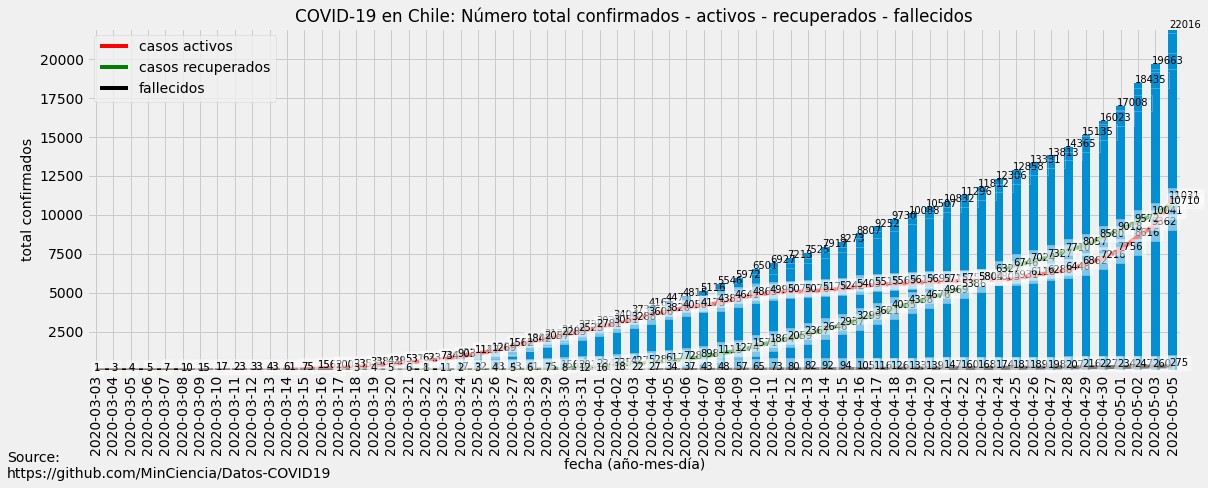

In [0]:
filename = date+'-COVID-19-Chile-TotalConfirmados-Activos-Rec-fallecidos.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'linear'
fontsize = 10

dataCum.plot(ax=ax, kind="bar")
my_tags(dataCum,scale,fontsize,1.4,'none')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.15,'white')

ax.plot(dataRec,color='green')
my_tags(dataRec,scale,fontsize,1.15,'white')

ax.plot(dataDeath,color='black')
my_tags(dataDeath,scale,fontsize,1.15,'white')

ax.set_ylim(0.9, dataCum.max())
ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['casos activos','casos recuperados', 'fallecidos'], loc = 'upper left')

ax.set_title(f'COVID-19 en Chile: Número total confirmados - activos - recuperados - fallecidos', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-80), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

La siguiente figura ayuda a visualizar la diferencia entre el número total de casos confirmados (acumulados) y los casos confirmados diariamente. 

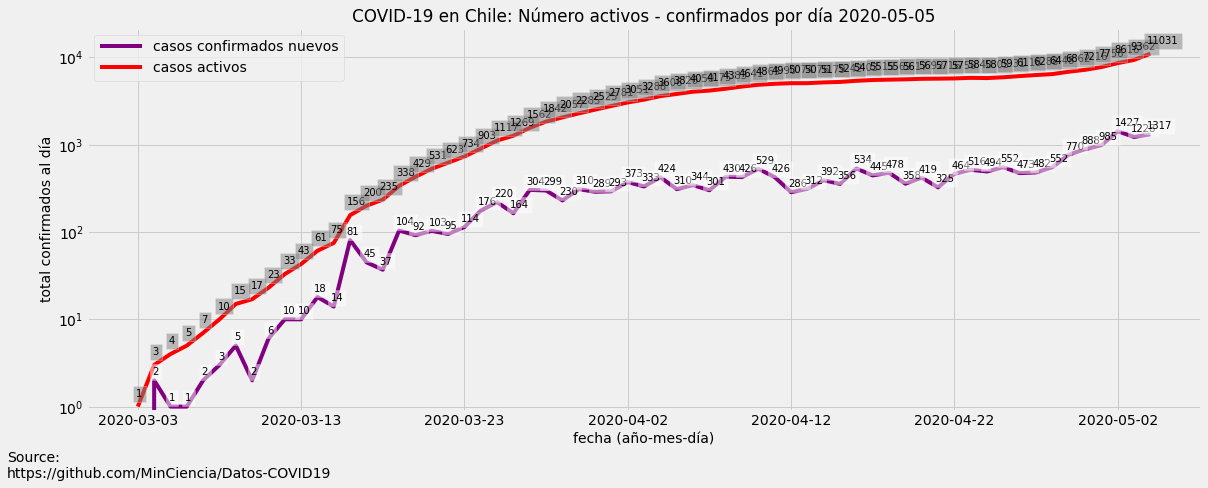

In [0]:
filename = date+'-COVID-19-Chile-Activos-ConfirmadosAlDia.png'

fig, ax = plt.subplots(tight_layout=True,figsize=(17,7))

scale = 'log'
fontsize = 10

dataNew.plot(ax=ax, color='purple')
my_tags(dataNew,scale,fontsize,1.15,'white')

ax.plot(dataActivo,color='red')
my_tags(dataActivo,scale,fontsize,1.3,'grey')

ax.set_ylim(0.9, dataCum.max())
plt.legend(fontsize='medium', labels=['casos confirmados nuevos','casos activos'], handlelength=3.0, loc = 'upper left')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número activos - confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='medium')
ax.set_ylabel(f'total confirmados al día', fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-40), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

In [0]:
# ejecutar esta celda solo si se quiere descargar el gráfico anterior

files.download(filename)

Estas son figuras básicas para trabajar con los productos del repositorio. La idea es que generes tus propios gráficos modificando las columnas, estilos, colores, etc. En los próximos notebooks encontrarás ejemplos para utilizar otros productos de datos que se encuentran disponibles en [https://github.com/MinCiencia/Datos-COVID19/tree/master/output](https://github.com/MinCiencia/Datos-COVID19/tree/master/output)